# WeatherPy

### Analysis
-  The max temperature is highest closest to the equator decreasing exponentially as you move toweards the poles. However it evens out 50-60 degrees latitude and then keeps decreasing.
- The greatest humidity also exists around the equator and while humidiety drops just north and south of the equator, it gradually increases after.
- It is cloudier north of the equator between 30-70 degrees and wind speed is highest at the poles and the equator

In [1]:
# Dependencies
import random

import json
import urllib
import gzip
import requests as req

import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create url, api key, and units
url = 'http://api.openweathermap.org/data/2.5/weather?'
apiKey = '25bc90a1196e6f153eece0bc0b0fc9eb'
unit = 'imperial'

# Write function to print a visual line break
def breaker():
    print('---------------------------------')

## Generate Cities List

In [2]:
owmCityJson = 'http://bulk.openweathermap.org/sample/city.list.json.gz'
owmCityList = [] #Open Weather Map's list of cities
sampleCities = [] #Sample cities
sampleSize = 1000


# Unzip Open Weather Map list of cities
with gzip.open(urllib.request.urlopen(owmCityJson)) as f: #unzip file from URL
    owmCities = json.load(f) #load json
    
    # For each city, append the name and country to a list as a tuple
    for city in owmCities: 
        owmCityList.append((city['name'].lower(),city['country'].lower()))

        
# Create sample of cities
for c in range(sampleSize):
    
    uniqueCities = True
    
    # While every city is not unique in the list
    while uniqueCities:
        
        # Find nearest city to randomly generated lat/long
        city = citipy.nearest_city(random.uniform(-90,90),random.uniform(-180,180)) #randomly select lat/long
        # Create list of tuples with city name and country
        sampleCities.append((city.city_name, city.country_code))
        uniqueCities = False #stop loop
        
        # If the length of sample cities isn't equal to the uniques only length
        # OR the city is not in the Open Weather Map's list of cities
        if len(sampleCities) != len(set(sampleCities)) or sampleCities[c] not in owmCityList:
            sampleCities.pop() #remove entry
            uniqueCities = True #go through loop again to generate new city

# Print the length of cities sampled
len(sampleCities)

1000

## Perform API Calls

In [3]:
count = 1 #count placeholder for printout
l = len(sampleCities) #length of sample cities
missing = 0 #placeholder for how many records won't be read properly
cityDet = [] #list for city details

print('Beginning Data Retrieval')
breaker()

# Create function to 
for city in sampleCities:
    
    # Compile query URL
    queryURL = '{}appid={}&q={},{}&units={}'.format(url,apiKey,city[0].replace(' ','+'),city[1],unit)
    # Read to a json
    weather = req.get(queryURL).json()
    
    # If there is a record of the city
    try:
        # Create a tuple of city details
        cityDet.append((weather['id'],
                        weather['name'],
                        weather['sys']['country'],
                        weather['coord']['lon'],
                        weather['coord']['lat'],
                        weather['main']['temp_max'],
                        weather['main']['humidity'],
                        weather['clouds']['all'],
                        weather['wind']['speed']))
        print('Processing Record {} of {} | {}, {}'.format(count,l,city[0],city[1]))
        print(queryURL)
        count += 1
    
    # If there is no record of that city
    except KeyError:
        print('Processing Record {} of {} | {}, {}'.format(count,l,city[0],city[1]))
        print('---This record cannot be found---')
        missing += 1

# End
breaker()
print('Data Retrieval Complete')
print('{} record(s) could not be found during retreival'.format(missing))
breaker()   

Beginning Data Retrieval
---------------------------------
Processing Record 1 of 1000 | mount isa, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mount+isa,au&units=imperial
Processing Record 2 of 1000 | aklavik, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aklavik,ca&units=imperial
Processing Record 3 of 1000 | cape town, za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape+town,za&units=imperial
Processing Record 4 of 1000 | punta arenas, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta+arenas,cl&units=imperial
Processing Record 5 of 1000 | ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia,ar&units=imperial
Processing Record 6 of 1000 | butaritari, ki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=butaritari

Processing Record 53 of 1000 | new norfolk, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=new+norfolk,au&units=imperial
Processing Record 54 of 1000 | quang ngai, vn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=quang+ngai,vn&units=imperial
Processing Record 55 of 1000 | grojdibodu, ro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grojdibodu,ro&units=imperial
Processing Record 56 of 1000 | lebu, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lebu,cl&units=imperial
Processing Record 57 of 1000 | georgetown, sh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=georgetown,sh&units=imperial
Processing Record 58 of 1000 | iranshahr, ir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=iranshahr,ir&units=imperial
Processing Record 59 of 1000 | cab

Processing Record 105 of 1000 | rudnogorsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rudnogorsk,ru&units=imperial
Processing Record 106 of 1000 | saint-augustin, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-augustin,ca&units=imperial
Processing Record 107 of 1000 | larsnes, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=larsnes,no&units=imperial
Processing Record 108 of 1000 | vao, nc
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vao,nc&units=imperial
Processing Record 109 of 1000 | avarua, ck
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=avarua,ck&units=imperial
Processing Record 110 of 1000 | manavalakurichi, in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=manavalakurichi,in&units=imperial
Processing Record 111 of 1

Processing Record 156 of 1000 | mareeba, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mareeba,au&units=imperial
Processing Record 157 of 1000 | isahaya, jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=isahaya,jp&units=imperial
Processing Record 158 of 1000 | kapaa, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kapaa,us&units=imperial
Processing Record 159 of 1000 | vestmanna, fo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vestmanna,fo&units=imperial
Processing Record 160 of 1000 | skjervoy, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=skjervoy,no&units=imperial
Processing Record 161 of 1000 | saint-philippe, re
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-philippe,re&units=imperial
Processing Record 162 of 1000 | treb

Processing Record 207 of 1000 | isla vista, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=isla+vista,us&units=imperial
Processing Record 208 of 1000 | tecoanapa, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tecoanapa,mx&units=imperial
Processing Record 209 of 1000 | soure, br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=soure,br&units=imperial
Processing Record 210 of 1000 | mushie, cd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mushie,cd&units=imperial
Processing Record 211 of 1000 | laguna, br
---This record cannot be found---
Processing Record 211 of 1000 | coahuayana, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=coahuayana,mx&units=imperial
Processing Record 212 of 1000 | muros, es
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0f

Processing Record 258 of 1000 | bayburt, tr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bayburt,tr&units=imperial
Processing Record 259 of 1000 | lorengau, pg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lorengau,pg&units=imperial
Processing Record 260 of 1000 | karratha, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=karratha,au&units=imperial
Processing Record 261 of 1000 | olavarria, ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=olavarria,ar&units=imperial
Processing Record 262 of 1000 | zhangjiakou, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=zhangjiakou,cn&units=imperial
Processing Record 263 of 1000 | san patricio, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san+patricio,mx&units=imperial
Processing Record 264 of 1

Processing Record 310 of 1000 | tiassale, ci
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiassale,ci&units=imperial
Processing Record 311 of 1000 | porto novo, cv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=porto+novo,cv&units=imperial
Processing Record 312 of 1000 | tomatlan, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tomatlan,mx&units=imperial
Processing Record 313 of 1000 | severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=severo-kurilsk,ru&units=imperial
Processing Record 314 of 1000 | teluknaga, id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=teluknaga,id&units=imperial
Processing Record 315 of 1000 | revelstoke, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=revelstoke,ca&units=imperial
Processing Record 

Processing Record 361 of 1000 | shimoda, jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shimoda,jp&units=imperial
Processing Record 362 of 1000 | podporozhye, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=podporozhye,ru&units=imperial
Processing Record 363 of 1000 | bengkulu, id
---This record cannot be found---
Processing Record 363 of 1000 | palmer, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=palmer,us&units=imperial
Processing Record 364 of 1000 | grimmen, de
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grimmen,de&units=imperial
Processing Record 365 of 1000 | kropotkin, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kropotkin,ru&units=imperial
Processing Record 366 of 1000 | ozernovskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eec

Processing Record 412 of 1000 | yumen, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yumen,cn&units=imperial
Processing Record 413 of 1000 | evensk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=evensk,ru&units=imperial
Processing Record 414 of 1000 | bac giang, vn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bac+giang,vn&units=imperial
Processing Record 415 of 1000 | gravdal, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gravdal,no&units=imperial
Processing Record 416 of 1000 | sungairaya, id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sungairaya,id&units=imperial
Processing Record 417 of 1000 | dandong, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dandong,cn&units=imperial
Processing Record 418 of 1000 | middlebury, us
h

Processing Record 463 of 1000 | billings, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=billings,us&units=imperial
Processing Record 464 of 1000 | makakilo city, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=makakilo+city,us&units=imperial
Processing Record 465 of 1000 | griffith, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=griffith,au&units=imperial
Processing Record 466 of 1000 | dumas, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dumas,us&units=imperial
Processing Record 467 of 1000 | kentau, kz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kentau,kz&units=imperial
Processing Record 468 of 1000 | jiwani, pk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jiwani,pk&units=imperial
Processing Record 469 of 1000 | aksarka, ru


Processing Record 514 of 1000 | komsomolskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=komsomolskiy,ru&units=imperial
Processing Record 515 of 1000 | yar-sale, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yar-sale,ru&units=imperial
Processing Record 516 of 1000 | lensk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lensk,ru&units=imperial
Processing Record 517 of 1000 | develi, tr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=develi,tr&units=imperial
Processing Record 518 of 1000 | qasigiannguit, gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=qasigiannguit,gl&units=imperial
Processing Record 519 of 1000 | san felipe, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san+felipe,mx&units=imperial
Processing Record 520 of 100

Processing Record 565 of 1000 | shubarkuduk, kz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shubarkuduk,kz&units=imperial
Processing Record 566 of 1000 | coquimbo, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=coquimbo,cl&units=imperial
Processing Record 567 of 1000 | sistranda, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sistranda,no&units=imperial
Processing Record 568 of 1000 | saint-claude, fr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-claude,fr&units=imperial
Processing Record 569 of 1000 | skibbereen, ie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=skibbereen,ie&units=imperial
Processing Record 570 of 1000 | bontang, id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bontang,id&units=imperial
Processing Record 571 

Processing Record 617 of 1000 | nkhotakota, mw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nkhotakota,mw&units=imperial
Processing Record 618 of 1000 | slave lake, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=slave+lake,ca&units=imperial
Processing Record 619 of 1000 | koshurnikovo, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=koshurnikovo,ru&units=imperial
Processing Record 620 of 1000 | tete, mz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tete,mz&units=imperial
Processing Record 621 of 1000 | celano, it
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=celano,it&units=imperial
Processing Record 622 of 1000 | cap-aux-meules, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cap-aux-meules,ca&units=imperial
Processing Record 623 of

Processing Record 668 of 1000 | westport, ie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=westport,ie&units=imperial
Processing Record 669 of 1000 | grand-santi, gf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grand-santi,gf&units=imperial
Processing Record 670 of 1000 | miles city, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=miles+city,us&units=imperial
Processing Record 671 of 1000 | grindavik, is
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grindavik,is&units=imperial
Processing Record 672 of 1000 | parrsboro, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=parrsboro,ca&units=imperial
Processing Record 673 of 1000 | elko, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=elko,us&units=imperial
Processing Record 674 of 1000 | kl

Processing Record 720 of 1000 | yerbogachen, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yerbogachen,ru&units=imperial
Processing Record 721 of 1000 | kharp, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kharp,ru&units=imperial
Processing Record 722 of 1000 | canmore, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=canmore,ca&units=imperial
Processing Record 723 of 1000 | dera bugti, pk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dera+bugti,pk&units=imperial
Processing Record 724 of 1000 | tessaoua, ne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tessaoua,ne&units=imperial
Processing Record 725 of 1000 | paita, pe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=paita,pe&units=imperial
Processing Record 726 of 1000 | den helder, 

Processing Record 772 of 1000 | north platte, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=north+platte,us&units=imperial
Processing Record 773 of 1000 | prachin buri, th
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=prachin+buri,th&units=imperial
Processing Record 774 of 1000 | lagos, ng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lagos,ng&units=imperial
Processing Record 775 of 1000 | morgan city, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=morgan+city,us&units=imperial
Processing Record 776 of 1000 | lubumbashi, cd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lubumbashi,cd&units=imperial
Processing Record 777 of 1000 | roebourne, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=roebourne,au&units=imperial
Processing Record 

Processing Record 823 of 1000 | pavlohrad, ua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pavlohrad,ua&units=imperial
Processing Record 824 of 1000 | novocheboksarsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=novocheboksarsk,ru&units=imperial
Processing Record 825 of 1000 | fayetteville, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=fayetteville,us&units=imperial
Processing Record 826 of 1000 | ahipara, nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ahipara,nz&units=imperial
Processing Record 827 of 1000 | luanda, ao
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=luanda,ao&units=imperial
Processing Record 828 of 1000 | carauari, br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=carauari,br&units=imperial
Processing Record 829 

Processing Record 874 of 1000 | qixingtai, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=qixingtai,cn&units=imperial
Processing Record 875 of 1000 | barra do corda, br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barra+do+corda,br&units=imperial
Processing Record 876 of 1000 | rawson, ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rawson,ar&units=imperial
Processing Record 877 of 1000 | havoysund, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=havoysund,no&units=imperial
Processing Record 878 of 1000 | wichita falls, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wichita+falls,us&units=imperial
Processing Record 879 of 1000 | mozhga, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mozhga,ru&units=imperial
Processing Record 880 

Processing Record 926 of 1000 | kloulklubed, pw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kloulklubed,pw&units=imperial
Processing Record 927 of 1000 | maracaibo, ve
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maracaibo,ve&units=imperial
Processing Record 928 of 1000 | gazli, uz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gazli,uz&units=imperial
Processing Record 929 of 1000 | empalme, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=empalme,mx&units=imperial
Processing Record 930 of 1000 | adilcevaz, tr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=adilcevaz,tr&units=imperial
Processing Record 931 of 1000 | rezekne, lv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rezekne,lv&units=imperial
Processing Record 932 of 1000 | susanger

Processing Record 977 of 1000 | newport, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=newport,us&units=imperial
Processing Record 978 of 1000 | juegang, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=juegang,cn&units=imperial
Processing Record 979 of 1000 | gizo, sb
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gizo,sb&units=imperial
Processing Record 980 of 1000 | osakarovka, kz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=osakarovka,kz&units=imperial
Processing Record 981 of 1000 | ferrol, es
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ferrol,es&units=imperial
Processing Record 982 of 1000 | llangefni, gb
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=llangefni,gb&units=imperial
Processing Record 983 of 1000 | ust-ilimsk, ru
htt

In [4]:
# Create and display city details in DataFrame
cityDetails = pd.DataFrame(cityDet,
                  columns=['ID','City','Country','Longitude','Latitude','Max Temperature (F)','Humidity','Cloudiness','Wind Speed (mph)'])
cityDetails.head()

,ID,City,Country,Longitude,Latitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,2065594,Mount Isa,AU,139.49,-20.73,84.2,51,0,5.82
1,5882953,Aklavik,CA,-135.01,68.22,15.8,84,20,3.36
2,3369157,Cape Town,ZA,18.42,-33.93,64.4,72,20,4.70
3,3874787,Punta Arenas,CL,-70.91,-53.16,50.0,53,40,28.86
4,3833367,Ushuaia,AR,-68.31,-54.81,50.0,66,75,29.97


In [24]:
# Create function to generate graphs and save figures

def createLatitudeScatterPlot(y):
    import datetime
    now = datetime.datetime.now()
    
    # Split a word to remove units
    ysplit = y.split(' (')
    
    # Create tile
    title = 'City Latitude v. {} '.format(ysplit[0]) 
    date = ' ({}/{}/{})'.format(now.month, now.day, now.year) #add date to title
    
    # Create scatter chart
    plt.scatter(cityDetails['Latitude'],cityDetails[y])
    plt.title(title + date)
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.show()
    
    # Save figure
    fig = plt.figure()
    fig.savefig('figures/{}.png'.format(title))

## Latitude v. Temperature Plot

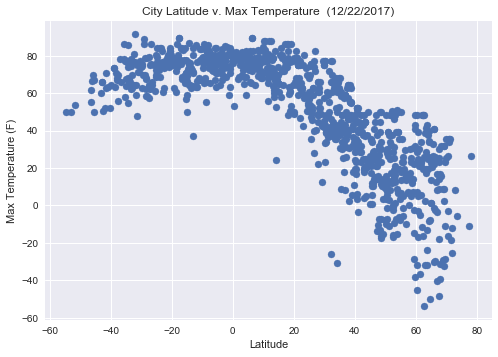

In [25]:
createLatitudeScatterPlot('Max Temperature (F)')

## Latitude v. Humidity Plot

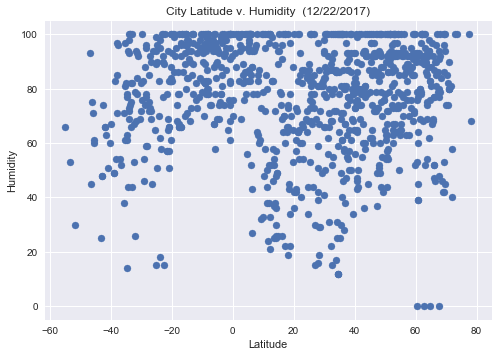

In [26]:
createLatitudeScatterPlot('Humidity')

## Latitude v. Cloudiness Plot

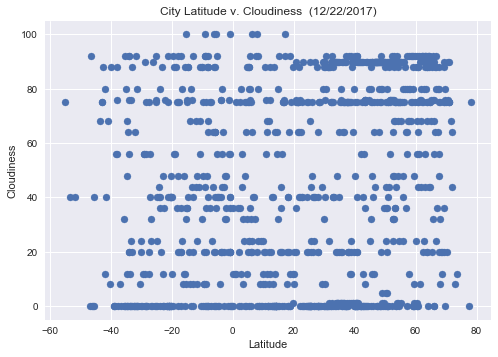

In [27]:
createLatitudeScatterPlot('Cloudiness')

## Latitude v. Wind Speed Plot

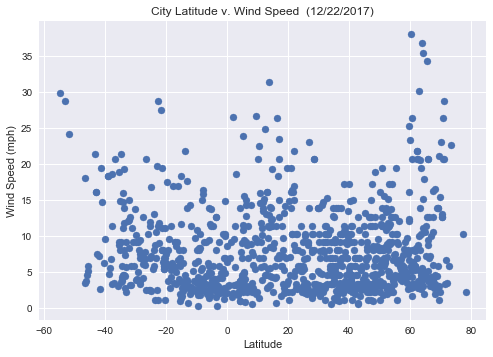

In [28]:
createLatitudeScatterPlot('Wind Speed (mph)')